<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/USED_CAR_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
df = pd.read_csv('/content/sample_data/train-data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [309]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [310]:
df.shape

(6019, 13)

In [311]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [312]:
df = df.drop('New_Price', axis=1)
df = df.dropna()

In [313]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [314]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [315]:
df['Fuel_Type'].nunique()

4

In [316]:
df['Location'].nunique()

11

In [317]:
df['Owner_Type'].nunique()

4

In [318]:
df['Mileage'] = df['Mileage'].apply(lambda x: float(x.replace('kmpl', '').replace('km/kg', '')))

In [319]:
df['Engine'] = df['Engine'].apply(lambda x: float(x.replace('CC', '')))

In [320]:
df['Power'] = df['Power'].apply(lambda x: float(x.replace('bhp', '').replace('null', '0')))

In [321]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [322]:
df = df.drop('Name', axis=1)

In [323]:
df = pd.get_dummies(df, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])

In [324]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [325]:
from sklearn.preprocessing import MinMaxScaler

In [326]:
X = df.drop('Price', axis=1)
y = df['Price']

In [327]:
cols = X.columns

In [328]:
ms = MinMaxScaler((0, 1))
X = ms.fit_transform(X)

In [329]:
X = pd.DataFrame(X, columns=cols)

In [330]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y)

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# **NEURAL SHEESH**

In [333]:
from tensorflow import keras
from tensorflow.keras import layers

In [334]:
X.shape

(5975, 27)

In [335]:
model = keras.Sequential([
    layers.Dense(13, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])

In [336]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [337]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200)

Epoch 1/200
36/36 [==============================] - 0s 1ms/step - loss: 2.7604
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 1.7393
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 1.0934
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 0.7857
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 0.5965
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 0.4753
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 0.3569
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3213
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 11/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2915
Epoch 12/200
36/36 [==============================] - 0s 1ms/step - loss: 0.2823
Epoch 13/200
36/36 [=================

In [338]:
pred = model.predict(X_test)

47/47 [==============================] - 0s 864us/step


In [339]:
pred

array([[0.9914944],
       [2.131308 ],
       [2.3088374],
       ...,
       [0.9039302],
       [0.9962391],
       [1.1884149]], dtype=float32)

In [342]:
y_test

5227    1.011601
1101    2.219203
1259    2.397895
4417    3.295837
202     1.791759
          ...   
3884    1.178655
5892    0.262364
2230    1.098612
4149    1.029619
1852    1.335001
Name: Price, Length: 1494, dtype: float64

In [340]:
h_df = pd.DataFrame(history.history)
h_df.head()

,loss
0,2.760425
1,1.739308
2,1.093359
3,0.785666
4,0.596493


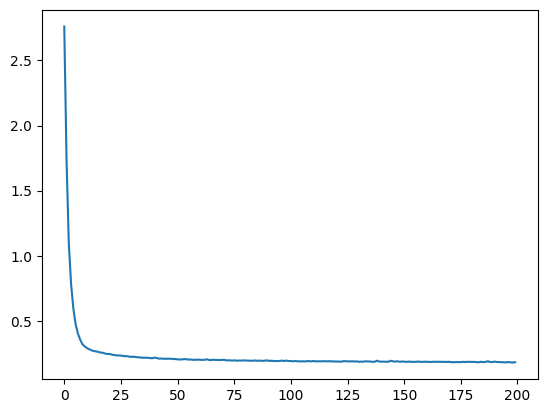

In [341]:
h_df['loss'].plot();

<img src='https://i.pinimg.com/564x/41/6c/81/416c81df54a044dc3ca8f0adef2fdf77.jpg'>